In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## • analyze only the users and not the admins
## • create two lists of values (for working days and for weekends) for the histogram input

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query1 = """
        SELECT timestamp FROM checker
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query1, con, parse_dates='timestamp')
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek
df['day'] = df['weekday'].apply(lambda x: 'weekend' if x > 4 else 'working_day')
df.pop('weekday')
df.pop('timestamp')
weekend_data = df.loc[df['day'] == 'weekend']['hour'].to_list()
working_data = df.loc[df['day'] == 'working_day']['hour'].to_list()

## • the figsize is still the same, you can choose the fontsize as well as the color palette
## • use a level of transparency for the histogram in front equal to 0.7

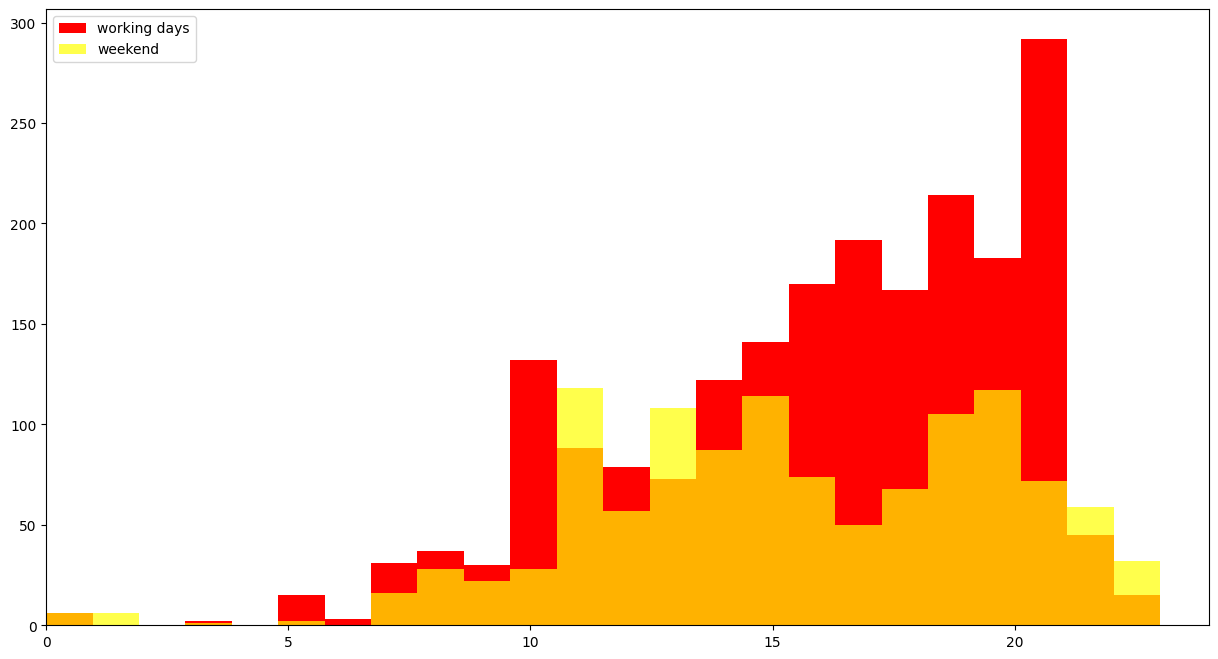

In [3]:
bins = 24
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_data, bins=bins, color='red', label='working days')
ax.hist(weekend_data, bins=bins, alpha=0.7, color='yellow', label='weekend')
ax.legend()
plt.xlim([0, 24])
plt.rc('font', size=20)
plt.show()

## • at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“Are there hours when the total number of commits was higher on weekends than
on working days?” In your answer, put the top-4 examples.

11, 13, 22, 23

In [4]:
con.close()